<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Download-images" data-toc-modified-id="Download-images-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Download images</a></span></li><li><span><a href="#Embed-faces" data-toc-modified-id="Embed-faces-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Embed faces</a></span></li><li><span><a href="#Download-and-embed" data-toc-modified-id="Download-and-embed-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Download and embed</a></span></li></ul></div>

In [4]:
from query.datasets.prelude import *
from query.datasets.ingest import ingest_pose
import pyspark.sql.functions as func

import query.datasets.tvnews.embed_google_images as embed_google_images

# Download images

In [5]:
IMG_DOWNLOAD_DIR = '/app/data/google_images'

In [6]:
curated_hosts = {
  "Hannity": {
    "producers": [],
    "hosts": ["Sean Hannity"]
  },
  "Happening Now": {
    "producers": [],
    "hosts": ["John Scott", "Melissa Francis"]
  },
  "All In With Chris Hayes": {
    "producers": [],
    "hosts": ["Chris Hayes"]
  },
  "Shepard Smith Reporting": {
    "producers": [],
    "hosts": ["Shepard Smith"]
  },
  "CNN Newsroom With Poppy Harlow": {
    "producers": [],
    "hosts": ["Poppy Harlow"]
  },
  "On the Record With Greta Van Susteren": {
    "producers": [],
    "hosts": ["Greta Van Susteren"]
  },
  "The OReilly Factor": {
    "producers": ["Bill O'Reilly"],
    "hosts": ["Bill O'Reilly"]
  },
  "The Kelly File": {
    "producers": [],
    "hosts": ["Megyn Kelly"]
  },
  "CNN Newsroom With Carol Costello": {
    "producers": [],
    "hosts": ["Carol Costello"]
  },
  "Americas Newsroom With Bill Hemmer and Martha MacCallum": {
    "producers": [],
    "hosts": ["Bill Hemmer", "Martha MacCallum"]
  },
  "Americas News HQ": {
    "producers": [],
    "hosts": ["Uma Pemmaraju", "Shannon Beam", "Kelly Wright", "Eric Shawn", "Arthel Neville", "Janice Dean", "Elizabeth Prann", "Doug McKelway", "Molly Henneberg", "Peter Doocy", "Bryan Llenas"]
  },
  "The Last Word With Lawrence ODonnell": {
    "producers": [],
    "hosts": ["Lawrence O'Donnell"]
  },
  "Hardball With Chris Matthews": {
    "producers": ["Ray Herbert"],
    "hosts": ["Chris Matthews"]
  },
  "Morning Joe": {
    "producers": ["Alex Korson", "Mike Buczkiewicz"],
    "hosts": ["Joe Scarborough", "Mika Brzezinski", "Willie Geist"]
  },
  "The 11th Hour With Brian Williams": {
    "producers": ["Julie Morse", "Patrick Burkey"],
    "hosts": ["Brian Williams"]
  },
  "Early Start With John Berman and Christine Romans": {
    "producers": [],
    "hosts": ["Christine Romans", "John Berman"]
  },
  "Outnumbered": {
    "producers": [],
    "hosts": ["Harris Faulkner", "Sandra Smith"]
  },
  "The Place for Politics 2016": {
    "producers": [],
    "hosts": ["Ari Melber", "Frances Rivera"]
  },
  "CNN Tonight With Don Lemon": {
    "producers": [],
    "hosts": ["Don Lemon"]
  },
  "Your World With Neil Cavuto": {
    "producers": [],
    "hosts": ["Neil Cavuto"]
  },
  "Anderson Cooper 360": {
    "producers": ["Charles Moore"],
    "hosts": ["Anderson Cooper"]
  },
  "CNN Newsroom With Fredricka Whitfield": {
    "producers": [],
    "hosts": ["Fredricka Whitfield"]
  },
  "CNN Newsroom Live": {
    "producers": [],
    "hosts": ["Brooke Baldwin", "John Berman", "Victor Blackwell", "Ana Cabrera", "Poppy Harlow", "Christi Paul", "Fredricka Whitfield"]
  },
  "CNN Newsroom With Brooke Baldwin": {
    "producers": [],
    "hosts": ["Brooke Baldwin"]
  },
  "MTP Daily": {
    "producers": ["John Reiss"],
    "hosts": ["Chuck Todd"]
  },
  "Wolf": {
    "producers": [],
    "hosts": ["Wolf Blitzer"]
  },
  "MSNBC Live": {
    "producers": [],
    "hosts": ["Brian Williams", "Chris Jansing", "Stephanie Ruhle", "Ali Velshi", "Hallie Jackson", "Craig Melvin", "Katy Tur", "Richard Lui"]
  },
  "The Rachel Maddow Show": {
    "producers": ["Rob Katko", "Bill Wolff", "Cory Gnazzo"],
    "hosts": ["Rachel Maddow"]
  },
  "New Day": {
    "producers": ["Javier Morgado"],
    "hosts": ["Chris Cuomo", "Alisyn Camerota", "Victor Blackwell", "Christi Paul"]
  },
  "The Lead With Jake Tapper": {
    "producers": ["Federico S. Quadrani"],
    "hosts": ["Jake Tapper"]
  },
  "Americas Newsroom": {
    "producers": [],
    "hosts": ["Bill Hemmer", "Sandra Smith"]
  },
  "Andrea Mitchell Reports": {
    "producers": [],
    "hosts": ["Andrea Mitchell"]
  },
  "The Five": {
    "producers": [],
    "hosts": ["Jesse Watters", "Kimberly Guilfoyle", "Greg Gutfeld", "Dana Perino", "Juan Williams"]
  },
  "Justice With Judge Jeanine": {
    "producers": [],
    "hosts": ["Jeanine Pirro"]
  },
  "FOX  Friends": {
    "producers": [],
    "hosts": ["Steve Doocy", "Ainsley Earhardt", "Brian Kilmeade", "Pete Hegseth", "Abby Huntsman", "Griff Jenkins"]
  },
  "Situation Room With Wolf Blitzer": {
    "producers": [],
    "hosts": ["Wolf Blitzer"]
  },
  "Erin Burnett OutFront": {
    "producers": [],
    "hosts": ["Erin Burnett"]
  },
  "Tucker Carlson Tonight": {
    "producers": [],
    "hosts": ["Tucker Carlson"]
  },
  "Special Report With Bret Baier": {
    "producers": [],
    "hosts": ["Bret Baier"]
  }
}

In [8]:
for k, v in curated_hosts.items():
    for host in v['hosts']:
        print('Downloading images for:', host)
        embed_google_images.fetch_images(host, outdir=IMG_DOWNLOAD_DIR)

Using cached /app/data/google_images/Brooke Baldwin
Using cached /app/data/google_images/Carol Costello
Using cached /app/data/google_images/Anderson Cooper
Using cached /app/data/google_images/Chris Matthews
Using cached /app/data/google_images/Uma Pemmaraju
Using cached /app/data/google_images/Shannon Beam
Using cached /app/data/google_images/Kelly Wright
Using cached /app/data/google_images/Eric Shawn
Using cached /app/data/google_images/Arthel Neville
Using cached /app/data/google_images/Janice Dean
Using cached /app/data/google_images/Elizabeth Prann
Using cached /app/data/google_images/Doug McKelway
Using cached /app/data/google_images/Molly Henneberg
Using cached /app/data/google_images/Peter Doocy
Using cached /app/data/google_images/Bryan Llenas
Using cached /app/data/google_images/Chuck Todd
Using cached /app/data/google_images/Sean Hannity
Using cached /app/data/google_images/Brooke Baldwin
Using cached /app/data/google_images/John Berman
Using cached /app/data/google_images

# Embed faces

In [10]:
EMBEDDINGS_DIR = '/app/data/face_embeddings'

In [11]:
import _pickle as pickle

# Embed the hosts
for show, data in curated_hosts.items():
    for host in data['hosts']:
        print ('Generating embedding:', host)
        emb = embed_google_images.embed_directory(os.path.join(IMG_DOWNLOAD_DIR, host))
        if emb is None:
            print('Failed to embed', host, file=sys.stderr)
        else:
            emb_file = os.path.join(EMBEDDINGS_DIR, '%s.pkl' % host)
            with open(emb_file, 'wb') as f:
                pickle.dump(emb, f, protocol=2)

Generating embedding: Brooke Baldwin
Reading images in: /app/data/google_images/Brooke Baldwin
Face: BoundingBox(x1=55.001299567520618, x2=199.35318446159363, y1=55.435817562043667, y2=209.18940141797066)
Face: BoundingBox(x1=120.53250482305884, x2=230.63954557478428, y1=158.06205262988806, y2=272.1291843354702)
Face: BoundingBox(x1=75.560960650444031, x2=296.88601949810982, y1=91.347435832023621, y2=326.81750401854515)
Face: BoundingBox(x1=179.71006011962891, x2=276.69801092147827, y1=35.789550755172968, y2=142.21005088090897)
Face: BoundingBox(x1=289.55803963541985, x2=374.23910619318485, y1=43.957873292267323, y2=137.41734688729048)
Face: BoundingBox(x1=259.85316398739815, x2=361.64055088162422, y1=57.660057757049799, y2=164.2877309024334)
Failed to detect faces in image
Face: BoundingBox(x1=408.80423425883055, x2=520.49895029887557, y1=51.24127896130085, y2=170.15114279836416)
Face: BoundingBox(x1=348.6433502137661, x2=563.35167226940393, y1=55.077716207131743, y2=284.9503114055842

Generating embedding: Uma Pemmaraju
Reading images in: /app/data/google_images/Uma Pemmaraju
Face: BoundingBox(x1=145.61050352454185, x2=231.11298504471779, y1=25.153697267174721, y2=115.90439716354012)
Multiple faces detected in image
Face: BoundingBox(x1=152.61400574445724, x2=266.39531445503235, y1=37.414292007684708, y2=156.56779636442661)
Face: BoundingBox(x1=82.214662242680788, x2=270.56314196437597, y1=53.415395468473434, y2=250.69747951067984)
Face: BoundingBox(x1=322.55732472240925, x2=524.33944803476334, y1=115.97937113791704, y2=340.66806498914957)
Multiple faces detected in image
Face: BoundingBox(x1=115.94557058811188, x2=354.49860990047455, y1=90.890919603407383, y2=347.60418708436191)
Face: BoundingBox(x1=217.85582745075226, x2=274.93958750367165, y1=121.75614094734192, y2=184.27991228923202)
Face: BoundingBox(x1=63.204933054745197, x2=242.24468153715134, y1=116.42186112701893, y2=312.37781919073313)
Failed to detect faces in image
Face: BoundingBox(x1=139.29169481992722

Generating embedding: Arthel Neville
Reading images in: /app/data/google_images/Arthel Neville
Failed to detect faces in image
Failed to detect faces in image
Multiple faces detected in image
Face: BoundingBox(x1=137.05284044146538, x2=297.10240630805492, y1=97.326179280877113, y2=270.06037636101246)
Multiple faces detected in image
Face: BoundingBox(x1=214.25258725136518, x2=340.99077178537846, y1=63.690161615610123, y2=200.33149015903473)
Failed to detect faces in image
Face: BoundingBox(x1=172.17837053537369, x2=245.22300709784031, y1=35.819460034370422, y2=115.64129711128771)
Failed to detect faces in image
Face: BoundingBox(x1=201.31334026902914, x2=375.921580478549, y1=61.803422808647156, y2=249.69875687360764)
Multiple faces detected in image
Face: BoundingBox(x1=303.70538091659546, x2=474.70965886116028, y1=55.020461112260818, y2=241.87926721572876)
Face: BoundingBox(x1=407.41326355934143, x2=586.99711647629738, y1=35.028331860899925, y2=222.36595231294632)
Failed to detect fac

Generating embedding: Peter Doocy
Reading images in: /app/data/google_images/Peter Doocy
Face: BoundingBox(x1=98.096542626619339, x2=165.76056125760078, y1=55.252784889191389, y2=127.01218705624342)
Multiple faces detected in image
Face: BoundingBox(x1=216.6004771143198, x2=355.32756980881095, y1=34.033427238464355, y2=184.48167967796326)
Face: BoundingBox(x1=99.58537895232439, x2=361.05891420692205, y1=60.852256715297699, y2=342.85427364334464)
Face: BoundingBox(x1=201.67797711491585, x2=354.04757964611053, y1=154.39639867097139, y2=317.96274023503065)
Multiple faces detected in image
Face: BoundingBox(x1=125.55696845054626, x2=328.56516224145889, y1=60.580329552292824, y2=272.93146608956158)
Face: BoundingBox(x1=355.72480604052544, x2=569.82346944510937, y1=68.739971682429314, y2=291.76434434950352)
Multiple faces detected in image
Face: BoundingBox(x1=217.61147867888212, x2=640.18630882352591, y1=17.237607136368752, y2=469.84182848036289)
Multiple faces detected in image
Face: Bound

Generating embedding: Brooke Baldwin
Reading images in: /app/data/google_images/Brooke Baldwin
Face: BoundingBox(x1=55.001299567520618, x2=199.35318446159363, y1=55.435817562043667, y2=209.18940141797066)
Face: BoundingBox(x1=120.53250482305884, x2=230.63954557478428, y1=158.06205262988806, y2=272.1291843354702)
Face: BoundingBox(x1=75.560960650444031, x2=296.88601949810982, y1=91.347435832023621, y2=326.81750401854515)
Face: BoundingBox(x1=179.71006011962891, x2=276.69801092147827, y1=35.789550755172968, y2=142.21005088090897)
Face: BoundingBox(x1=289.55803963541985, x2=374.23910619318485, y1=43.957873292267323, y2=137.41734688729048)
Face: BoundingBox(x1=259.85316398739815, x2=361.64055088162422, y1=57.660057757049799, y2=164.2877309024334)
Failed to detect faces in image
Face: BoundingBox(x1=408.80423425883055, x2=520.49895029887557, y1=51.24127896130085, y2=170.15114279836416)
Face: BoundingBox(x1=348.6433502137661, x2=563.35167226940393, y1=55.077716207131743, y2=284.9503114055842

Generating embedding: Poppy Harlow
Reading images in: /app/data/google_images/Poppy Harlow
Face: BoundingBox(x1=263.82533764839172, x2=465.19598653912544, y1=16.100110724568367, y2=237.39492872171104)
Multiple faces detected in image
Face: BoundingBox(x1=144.70832762122154, x2=253.39466932415962, y1=51.589934721589088, y2=169.51279102265835)
Face: BoundingBox(x1=184.89468026161194, x2=342.65823093056679, y1=16.271275877952576, y2=189.8968371655792)
Multiple faces detected in image
Face: BoundingBox(x1=161.57378765940666, x2=236.12409508228302, y1=41.27519616484642, y2=122.84577514231205)
Multiple faces detected in image
Face: BoundingBox(x1=229.39371375739574, x2=326.23806411027908, y1=8.6890147775411606, y2=115.7821109443903)
Multiple faces detected in image
Multiple faces detected in image
Face: BoundingBox(x1=141.15756870061159, x2=256.85795875638723, y1=113.22233738005161, y2=237.78420183062553)
Multiple faces detected in image
Face: BoundingBox(x1=238.50216066837311, x2=392.077602

Generating embedding: Brian Kilmeade
Reading images in: /app/data/google_images/Brian Kilmeade
Face: BoundingBox(x1=1.9911646470427513, x2=187.39176990836859, y1=96.132903173565865, y2=293.89054937288165)
Face: BoundingBox(x1=394.58278965950012, x2=651.79454690217972, y1=37.493321180343628, y2=313.72250398248434)
Face: BoundingBox(x1=243.90731421858072, x2=414.50121128559113, y1=64.932929784059525, y2=244.92217503301799)
Multiple faces detected in image
Face: BoundingBox(x1=118.43125320971012, x2=351.21325379610062, y1=65.02294072508812, y2=313.35022489912808)
Multiple faces detected in image
Multiple faces detected in image
Multiple faces detected in image
Failed to detect faces in image
Face: BoundingBox(x1=74.590355649590492, x2=234.74717148393393, y1=48.373236909508705, y2=220.23558049462736)
Face: BoundingBox(x1=272.09949418902397, x2=588.65023726224899, y1=0.0, y2=337.66317921876907)
Failed to detect faces in image
Face: BoundingBox(x1=270.2185340821743, x2=536.79391986131668, y1

Generating embedding: Lawrence O'Donnell
Reading images in: /app/data/google_images/Lawrence O'Donnell
Multiple faces detected in image
Face: BoundingBox(x1=179.07712253928185, x2=349.45491179823875, y1=86.376776017248631, y2=263.34351966530085)
Face: BoundingBox(x1=704.23966726660728, x2=918.40016096830368, y1=93.487717978656292, y2=323.13958875648677)
Multiple faces detected in image
Multiple faces detected in image
Face: BoundingBox(x1=98.579559750854969, x2=311.06444830447435, y1=62.551898829638958, y2=290.6921873241663)
Failed to detect faces in image
Face: BoundingBox(x1=539.0165890827775, x2=752.20082150399685, y1=63.209954470396042, y2=283.60344202816486)
Multiple faces detected in image
Face: BoundingBox(x1=107.77972112596035, x2=240.68217284232378, y1=38.720927178859711, y2=177.59381940960884)
Multiple faces detected in image
Face: BoundingBox(x1=124.77301327139139, x2=259.57337196171284, y1=49.614973545074463, y2=191.43414314836264)
Multiple faces detected in image
Face: Bou

Generating embedding: Wolf Blitzer
Reading images in: /app/data/google_images/Wolf Blitzer
Face: BoundingBox(x1=120.74477519094944, x2=282.26915207505226, y1=45.130889266729355, y2=216.67261999845505)
Face: BoundingBox(x1=155.39062161743641, x2=373.95834417641163, y1=51.923227325081825, y2=286.69796368665993)
Face: BoundingBox(x1=92.403147220611572, x2=256.99264430999756, y1=94.284914672374725, y2=268.73133144155145)
Failed to detect faces in image
Face: BoundingBox(x1=232.50290151685476, x2=396.02727493643761, y1=65.445019245147705, y2=237.22089359164238)
Multiple faces detected in image
Face: BoundingBox(x1=440.61922615766525, x2=598.68425878882408, y1=84.700226910412312, y2=254.59205305576324)
Face: BoundingBox(x1=225.38702540099621, x2=340.76042972132564, y1=45.717004230245948, y2=169.55920888204128)
Face: BoundingBox(x1=63.366391882300377, x2=337.91852110624313, y1=65.622148729860783, y2=348.23096008598804)
Face: BoundingBox(x1=250.60390487313271, x2=416.63594288378954, y1=66.9004

Generating embedding: John Scott
Reading images in: /app/data/google_images/John Scott
Face: BoundingBox(x1=317.41833339631557, x2=411.07071506977081, y1=67.147294603288174, y2=161.52292244136333)
Face: BoundingBox(x1=103.43910369277, x2=186.3982282243669, y1=45.674038469791412, y2=130.64556382969022)
Failed to detect faces in image
Failed to detect faces in image
Face: BoundingBox(x1=226.2047988474369, x2=427.02219999581575, y1=39.724379926919937, y2=247.30535090900958)
Failed to detect faces in image
Failed to detect faces in image
Failed to detect faces in image
Face: BoundingBox(x1=46.21350833773613, x2=189.13158573210239, y1=63.01859674602747, y2=211.34102330170572)
Failed to detect faces in image
Failed to detect faces in image
Failed to detect faces in image
Failed to detect faces in image
Face: BoundingBox(x1=342.50424441695213, x2=453.23392373323441, y1=49.282746765762568, y2=166.21801912412047)
Failed to detect faces in image
Failed to detect faces in image
Failed to detect f

Generating embedding: Ari Melber
Reading images in: /app/data/google_images/Ari Melber
Multiple faces detected in image
Face: BoundingBox(x1=148.04081338644028, x2=257.98182763159275, y1=34.911051712930202, y2=151.44568855315447)
Face: BoundingBox(x1=204.58183550834656, x2=389.15500244498253, y1=72.439761705696583, y2=269.12687741406262)
Face: BoundingBox(x1=223.10305155813694, x2=481.99392184615135, y1=14.235317885875702, y2=294.82631742954254)
Multiple faces detected in image
Face: BoundingBox(x1=247.42577612400055, x2=379.9371035695076, y1=55.469891220331192, y2=198.11702434718609)
Face: BoundingBox(x1=365.75892142951488, x2=610.6628138422966, y1=58.574415966868401, y2=326.17174947168678)
Multiple faces detected in image
Multiple faces detected in image
Face: BoundingBox(x1=86.725703239440918, x2=332.81410140544176, y1=55.650173008441925, y2=325.16801107674837)
Face: BoundingBox(x1=139.73551326990128, x2=255.97081178426743, y1=45.045996744185686, y2=170.15637241303921)
Face: Boundin

Generating embedding: Harris Faulkner
Reading images in: /app/data/google_images/Harris Faulkner
Face: BoundingBox(x1=57.146730519831181, x2=231.52656404674053, y1=59.485396176576614, y2=244.37872808426619)
Face: BoundingBox(x1=387.16658683121204, x2=497.96942753717303, y1=43.15936616808176, y2=160.05822510272264)
Failed to detect faces in image
Failed to detect faces in image
Face: BoundingBox(x1=84.81218409538269, x2=298.35024279356003, y1=62.882842034101486, y2=288.63943085633218)
Face: BoundingBox(x1=122.12098554521799, x2=278.88265205919743, y1=63.811564236879349, y2=226.18808118999004)
Face: BoundingBox(x1=285.4053250066936, x2=585.05939032137394, y1=101.51167308539152, y2=414.97576604783535)
Face: BoundingBox(x1=70.168140843510628, x2=241.1569250524044, y1=35.590203404426575, y2=217.83412811905146)
Face: BoundingBox(x1=259.91438996046782, x2=572.79112200438976, y1=116.64193421602249, y2=454.4912203270942)
Face: BoundingBox(x1=100.52075076848269, x2=406.75639265775681, y1=119.152

Generating embedding: Bill Hemmer
Reading images in: /app/data/google_images/Bill Hemmer
Face: BoundingBox(x1=150.71787133812904, x2=266.71926090121269, y1=35.978165805339813, y2=162.64075243100524)
Multiple faces detected in image
Multiple faces detected in image
Face: BoundingBox(x1=289.41236141324043, x2=404.72271251678467, y1=177.76281242072582, y2=300.8144226372242)
Multiple faces detected in image
Face: BoundingBox(x1=133.08393234014511, x2=287.32355216145515, y1=44.165397584438324, y2=206.60061749070883)
Face: BoundingBox(x1=138.54379379749298, x2=329.85728722810745, y1=27.803269922733307, y2=232.50807528197765)
Face: BoundingBox(x1=343.89062595367432, x2=448.20647692680359, y1=54.432831943035126, y2=164.28575479984283)
Face: BoundingBox(x1=195.28614410758018, x2=321.13633117824793, y1=56.381038457155228, y2=191.343895226717)
Face: BoundingBox(x1=148.10360389947891, x2=308.34353655576706, y1=47.184548810124397, y2=215.08989897370338)
Multiple faces detected in image
Face: Boundi

Generating embedding: Tucker Carlson
Reading images in: /app/data/google_images/Tucker Carlson
Face: BoundingBox(x1=412.80975249782205, x2=623.18089973926544, y1=105.9688084051013, y2=338.42027099430561)
Face: BoundingBox(x1=103.55082127451897, x2=553.84686268866062, y1=120.44359219074249, y2=600.70514971017838)
Face: BoundingBox(x1=175.26420366764069, x2=466.69012975692749, y1=81.020751863718033, y2=395.85736328363419)
Face: BoundingBox(x1=344.22318857908249, x2=682.50047132372856, y1=89.721068948507309, y2=446.6527807507664)
Face: BoundingBox(x1=174.84938883781433, x2=406.74773514270782, y1=63.443298920989037, y2=315.68059466779232)
Face: BoundingBox(x1=237.44202047586441, x2=560.52729319036007, y1=81.172634370625019, y2=425.40583593584597)
Face: BoundingBox(x1=240.72513350844383, x2=438.55657455325127, y1=69.564245209097862, y2=271.16065341606736)
Face: BoundingBox(x1=281.01776513457298, x2=552.37690651416779, y1=93.175993762910366, y2=378.53383773565292)
Face: BoundingBox(x1=170.65

Generating embedding: Brian Williams
Reading images in: /app/data/google_images/Brian Williams
Face: BoundingBox(x1=374.16767816245556, x2=589.62231666594744, y1=119.62175700068474, y2=348.5947435721755)
Face: BoundingBox(x1=292.65613573044538, x2=516.52027715742588, y1=46.188463494181633, y2=295.10827025584877)
Face: BoundingBox(x1=385.58908849954605, x2=594.95292691886425, y1=87.303666621446609, y2=310.46277596056461)
Face: BoundingBox(x1=405.84551474452019, x2=702.71544790267944, y1=142.24106699228287, y2=461.7214884236455)
Face: BoundingBox(x1=213.94259279221296, x2=366.39534143358469, y1=59.529649034142494, y2=224.80979372374713)
Face: BoundingBox(x1=223.86259404569864, x2=420.79545429348946, y1=80.609406355768442, y2=287.02944723516703)
Face: BoundingBox(x1=155.70259761810303, x2=279.29092085361481, y1=35.848813824355602, y2=172.16221106983721)
Face: BoundingBox(x1=279.16994772851467, x2=525.55011780560017, y1=77.828822553157806, y2=343.91936881840229)
Face: BoundingBox(x1=166.72

Generating embedding: Hallie Jackson
Reading images in: /app/data/google_images/Hallie Jackson
Face: BoundingBox(x1=164.15520095825195, x2=354.95127749443054, y1=72.999835565686226, y2=279.18275748006999)
Face: BoundingBox(x1=26.747729778289795, x2=266.19020938873291, y1=52.589502215385437, y2=321.72363153100014)
Multiple faces detected in image
Face: BoundingBox(x1=107.83083460479975, x2=241.34645754098892, y1=24.595740556716919, y2=169.06907388567924)
Face: BoundingBox(x1=364.93148250132799, x2=470.29380483180285, y1=96.379738301038742, y2=208.34276414476335)
Face: BoundingBox(x1=243.23309373855591, x2=448.71383816003799, y1=65.822146952152252, y2=291.03807037696242)
Face: BoundingBox(x1=313.89800983667374, x2=463.29165408015251, y1=45.78686811029911, y2=209.95714798569679)
Face: BoundingBox(x1=57.728581160306931, x2=268.319878667593, y1=52.42468073964119, y2=284.30106642842293)
Multiple faces detected in image
Face: BoundingBox(x1=512.52028205990791, x2=741.70609960705042, y1=57.675

Generating embedding: Chris Cuomo
Reading images in: /app/data/google_images/Chris Cuomo
Failed to detect faces in image
Face: BoundingBox(x1=274.37593145668507, x2=427.29929287731647, y1=16.586296565830708, y2=178.99039141088724)
Face: BoundingBox(x1=342.35761676728725, x2=701.37527267634869, y1=69.034305408596992, y2=463.67252191901207)
Failed to detect faces in image
Face: BoundingBox(x1=141.15129490196705, x2=261.40624978393316, y1=40.496148392558098, y2=166.99248820543289)
Multiple faces detected in image
Face: BoundingBox(x1=94.568931348621845, x2=250.46874406188726, y1=52.841137580573559, y2=218.35357879847288)
Face: BoundingBox(x1=368.88438040018082, x2=538.45814308524132, y1=31.838502258062363, y2=216.92941308394074)
Face: BoundingBox(x1=315.26680763810873, x2=630.71180099248886, y1=78.055368572473526, y2=427.55019426345825)
Failed to detect faces in image
Face: BoundingBox(x1=113.48528289794922, x2=460.57009816169739, y1=111.38311743736267, y2=483.24697947502136)
Face: Boundi

Generating embedding: Jesse Watters
Reading images in: /app/data/google_images/Jesse Watters
Face: BoundingBox(x1=291.01124684512615, x2=461.85933020710945, y1=65.350228190422058, y2=246.3171354457736)
Face: BoundingBox(x1=187.13563162088394, x2=424.4583153128624, y1=68.74074125289917, y2=319.69397068023682)
Multiple faces detected in image
Multiple faces detected in image
Face: BoundingBox(x1=209.99005331099033, x2=455.92865408211946, y1=67.157949686050415, y2=330.7152284681797)
Face: BoundingBox(x1=331.19716344773769, x2=601.88038662075996, y1=96.529439568519592, y2=385.3060335367918)
Multiple faces detected in image
Failed to detect faces in image
Multiple faces detected in image
Failed to detect faces in image
Multiple faces detected in image
Multiple faces detected in image
Face: BoundingBox(x1=298.30931239575148, x2=436.22682522237301, y1=47.102731227874756, y2=193.24282412230968)
Failed to detect faces in image
Multiple faces detected in image
Failed to detect faces in image
Fac

Generating embedding: Juan Williams
Reading images in: /app/data/google_images/Juan Williams
Face: BoundingBox(x1=462.52035212516785, x2=717.05841301381588, y1=83.459621280431747, y2=352.68443063646555)
Face: BoundingBox(x1=261.41582427918911, x2=396.6581018269062, y1=50.56831094622612, y2=193.34609484672546)
Face: BoundingBox(x1=182.25651112571359, x2=347.16866239905357, y1=31.493109982460737, y2=207.19371891766787)
Face: BoundingBox(x1=122.50518191605806, x2=328.97784723341465, y1=38.363193973898888, y2=257.08564285933971)
Multiple faces detected in image
Failed to detect faces in image
Face: BoundingBox(x1=208.49215164780617, x2=401.86106836795807, y1=19.72008490562439, y2=229.17732980847359)
Face: BoundingBox(x1=204.78372484445572, x2=351.21165898442268, y1=54.901348978281021, y2=209.86990493535995)
Face: BoundingBox(x1=0.0, x2=679.34385564178228, y1=112.66671577841043, y2=830.34707235824317)
Face: BoundingBox(x1=162.28017023205757, x2=432.60236500948668, y1=54.114367455244064, y2=

Generating embedding: John Berman
Reading images in: /app/data/google_images/John Berman
Multiple faces detected in image
Failed to detect faces in image
Face: BoundingBox(x1=95.169487908482552, x2=238.88037969172001, y1=60.28170719742775, y2=216.85634033381939)
Face: BoundingBox(x1=364.65918470919132, x2=600.50214971601963, y1=61.252206485718489, y2=328.23008284159005)
Face: BoundingBox(x1=350.69315648078918, x2=570.86190949380398, y1=43.302339911460876, y2=285.17465110123158)
Face: BoundingBox(x1=668.24782662093639, x2=833.2669476121664, y1=106.4827387034893, y2=287.45042587816715)
Failed to detect faces in image
Face: BoundingBox(x1=209.48080889880657, x2=341.03272945433855, y1=86.941209986805916, y2=235.04953683912754)
Face: BoundingBox(x1=106.36333045363426, x2=267.63401246070862, y1=66.859561756253242, y2=231.82211728021502)
Face: BoundingBox(x1=174.32501624524593, x2=262.41668403148651, y1=53.731581628322601, y2=150.92281704396009)
Face: BoundingBox(x1=160.29078480601311, x2=330

# Download and embed

In [15]:
anderson_cooper = embed_google_images.name_to_embedding('Anderson Cooper')
john_mccain = embed_google_images.name_to_embedding('John McCain')
kellyanne_conway = embed_google_images.name_to_embedding('Kellyanne Conway')


Item no.: 1 --> Item name = "Anderson Cooper"
Evaluating...
Starting Download...
Completed Image ====> 1. anderson-cooper-haiti.jpg
Completed Image ====> 2. 636353892648285432-afp-afp-oi2ww-90962802.jpg
Completed Image ====> 3. 13-anderson-cooper-hack.w710.h473.jpg
Completed Image ====> 4. anderson_cooper_360.jpg
Completed Image ====> 5. anderson-cooper.jpg
Completed Image ====> 6. anderson-cooper.jpg
Completed Image ====> 7. andersoncooper51.jpg
Completed Image ====> 8. thumbnail_anderson-cooper3601.jpg
Completed Image ====> 9. 180315-anderson-cooper-break-up-feature-copy.jpg
Completed Image ====> 10. anderson-cooper-420cdeb8c3.jpg
Completed Image ====> 11. mgid:ao:image:logotv.com
Completed Image ====> 12. cooper-anderson-speaker1.original.jpg
Completed Image ====> 13. anderson-cooper-signs-copies-of-book-the-rainbow-comes-and-goes-01.jpg
Completed Image ====> 14. cooper.anderson.b.jpg
Completed Image ====> 15. 01102018%2bac360.jpg
Completed Image ====> 16. ian-14.jpg
Completed Imag


Item no.: 1 --> Item name = "Kellyanne Conway"
Evaluating...
Starting Download...
Completed Image ====> 1. opiods_pennsylvania_conway_90762.jpg
Completed Image ====> 2. 923474528.jpg
Completed Image ====> 3. 8s0fsjtv_400x400.jpg
Completed Image ====> 4. 170319092139-kellyanne-conway-file-0314-super-tease.jpg
Completed Image ====> 5. 869e8411-866d-49b5-a5d1-60af4b684619.jpeg
Completed Image ====> 6. ?url=https%3a%2f%2fstatic.politico.com%2f45%2f71%2fdf1f73e140a6b28c0d4a43ec51dd%2f180402-kellyanne-conway-ap-1160.jpg.jpg
Completed Image ====> 7. 29-kellyanne-conway.w710.h473.jpg
Completed Image ====> 8. 09-kellyanne-conway.jpg
Completed Image ====> 9. 0cf5504aae8aa80e647fc215f26143af.jpg
Completed Image ====> 10. getfile.asp
Completed Image ====> 11. ?url=https%3a%2f%2fstatic.politico.com%2f05%2f34%2ff92f95bb411185c41eadcc7e1e00%2f180202-kellyanne-conway-ap-1160.jpg.jpg
Completed Image ====> 12. kellyanne-conway-gma-800x430.jpg
Completed Image ====> 13. trump_conway_93559_c0-148-5070-310

In [16]:
import _pickle as pickle

def read_face_feature_file(file_name):
    with open(file_name, 'rb') as f:
        obj = pickle.load(f, encoding='latin1')
        faces = obj['faces']
        show_name = obj['name']
        show_id = obj['id']
        face_ids = []
        face_features = []
        face_id_to_meta = {}
        for x in faces:
            face_ids.append(x[0])
            face_features.append(x[1])
            face_id_to_meta[x[0]] = x[2]
        face_ids = np.array(face_ids, dtype=np.int32)
        face_features = np.stack(face_features, axis=0)
    return show_id, face_ids, face_features, face_id_to_meta

def get_face_features(video_id):
    return read_face_feature_file('/app/data/face_features_by_video/%d.pkl' % video_id)
    
ac360_videos = list(Video.objects.filter(show__name='Anderson Cooper 360'))
l2_dists = []
for video in ac360_videos:
    try:
        _, face_ids, face_features, _ = get_face_features(video.id)
        dists = np.linalg.norm(face_features - kellyanne_conway, axis=1)
#         print(john_mccain.shape, dists.shape)
        for i in range(len(face_ids)):
            l2_dists.append((face_ids[i], dists[i]))
    except Exception as e:
        print(e)

[Errno 2] No such file or directory: '/app/data/face_features_by_video/2662.pkl'
[Errno 2] No such file or directory: '/app/data/face_features_by_video/2943.pkl'
[Errno 2] No such file or directory: '/app/data/face_features_by_video/9873.pkl'
[Errno 2] No such file or directory: '/app/data/face_features_by_video/11627.pkl'
[Errno 2] No such file or directory: '/app/data/face_features_by_video/13408.pkl'
[Errno 2] No such file or directory: '/app/data/face_features_by_video/14285.pkl'
[Errno 2] No such file or directory: '/app/data/face_features_by_video/15406.pkl'
[Errno 2] No such file or directory: '/app/data/face_features_by_video/15801.pkl'
[Errno 2] No such file or directory: '/app/data/face_features_by_video/15831.pkl'
[Errno 2] No such file or directory: '/app/data/face_features_by_video/15969.pkl'
[Errno 2] No such file or directory: '/app/data/face_features_by_video/18619.pkl'
[Errno 2] No such file or directory: '/app/data/face_features_by_video/20204.pkl'
[Errno 2] No such f

[(11307364, 0.46879059), (6834632, 0.46960866), (18842836, 0.47367078), (23145190, 0.47382569), (6834675, 0.47730777), (6834645, 0.48354033), (21623289, 0.4836731), (16172661, 0.48452929), (2632264, 0.484685), (6834669, 0.48926523), (11572638, 0.48944938), (18842778, 0.49618712), (18842832, 0.49795339), (6834640, 0.499549), (23301517, 0.50120902), (6834647, 0.50411338), (8728732, 0.50602823), (11572679, 0.51112813), (6834639, 0.51124305), (18842752, 0.51137871), (18842827, 0.51278603), (23301492, 0.5167079), (20665503, 0.51870167), (2632262, 0.51934874), (15712343, 0.51987767), (38670996, 0.52007067), (20665492, 0.52047628), (15712450, 0.52155912), (15712250, 0.52299267), (23301737, 0.52369672), (43668027, 0.52471608), (17215684, 0.52503538), (12584816, 0.52544457), (6834709, 0.52672952), (24285741, 0.52687949), (10557949, 0.52768761), (9804827, 0.52806127), (23301721, 0.52808619), (15712458, 0.52883708), (33288915, 0.52918267), (1918904, 0.52979189), (20714015, 0.5298022), (2632263, 0

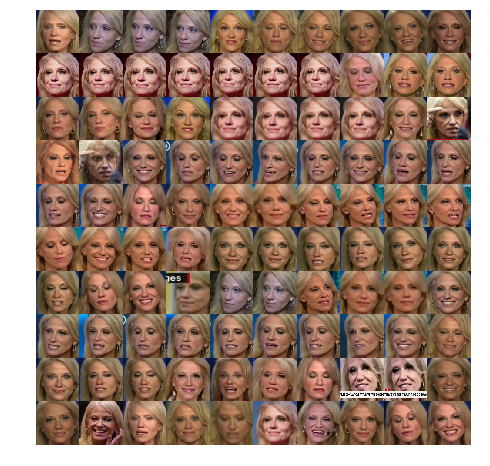

In [17]:
sorted_l2_dists = sorted(l2_dists, key=lambda x: x[1])
print(sorted_l2_dists[:100])

import cv2

def face_img(face):
    return crop(load_frame(face.person.frame.video, face.person.frame.number, []), face)

def faces_to_tiled_img(faces):
    def tile(imgs, rows=None, cols=None):
        # If neither rows/cols is specified, make a square
        if rows is None and cols is None:
            rows = int(math.sqrt(len(imgs)))

        if rows is None:
            rows = int((len(imgs) + cols - 1) / cols)
        else:
            cols = int((len(imgs) + rows - 1) / rows)

        # Pad missing frames with black
        diff = rows * cols - len(imgs)
        if diff != 0:
            imgs.extend([np.zeros(imgs[0].shape, dtype=imgs[0].dtype) for _ in range(diff)])

        return np.vstack([np.hstack(imgs[i * cols:(i + 1) * cols]) for i in range(rows)])
    
    face_imgs = par_for(face_img, faces)
    im = tile([cv2.resize(img, (100, 100)) for img in face_imgs])
    return im

im = faces_to_tiled_img(Face.objects.filter(id__in=[x[0] for x in sorted_l2_dists[:100]]))
imshow(im)
plt.show()
